In [1]:
import numpy as np

def eca_get_lut(rule_num):
  return np.array([int(x) for x in bin(rule_num)[2:].zfill(8)], dtype=np.uint8)

def eca_evolve(lut, x):
  return lut[7 - (np.roll(x, 1) * 4 + x * 2 + np.roll(x, -1))]


In [2]:
from itertools import product

triple_bits = [list(tup) for tup in list(product([1, 0], repeat=3))]
    
def get_neighborhoods(lst):
    n = len(lst)
    neighborhood = [[lst[(i-1) % n], lst[i], lst[(i+1) % n]] for i in range(n)]
    return neighborhood

def eca_step(rule, configuration):
    neighborhoods = get_neighborhoods(configuration)
    next_configuration = [rule[triple_bits.index(neighborhood)] for neighborhood in neighborhoods]
    return next_configuration

In [3]:
import timeit

def setup_eca_evolve(length, rule_num=150):
    lut = eca_get_lut(rule_num)
    initial_configuration = np.random.randint(2, size=length, dtype=np.uint8)
    return lut, initial_configuration

def measure_eca_evolve(length, number_of_executions=100):
    setup_code = f'''
from __main__ import setup_eca_evolve, eca_evolve, eca_step
lut, initial_configuration = setup_eca_evolve({length})
'''

    setup_code2 = f'''
from __main__ import setup_eca_evolve, eca_evolve, eca_step
lut, x = setup_eca_evolve({length})
initial_configuration = list(x)
'''

    test_code = '''eca_evolve(lut, initial_configuration)'''
    test_code2 = '''eca_step(lut, initial_configuration)'''

    execution_time = timeit.timeit(stmt=test_code, setup=setup_code, number=number_of_executions)
    execution_time2 = timeit.timeit(stmt=test_code2, setup=setup_code2, number=number_of_executions)
    
    return execution_time, execution_time2  

lengths = list(range(10, 100, 10)) + list(range(100, 1000, 100)) + list(range(1000, 10000, 1000)) + list(range(10000, 100001, 10000))

execution_times = {length: measure_eca_evolve(length) for length in lengths}

print(execution_times)

result = [v[1] / v[0] for v in execution_times.values()]

{10: (0.004311625030823052, 0.00536145904334262), 20: (0.0021139580057933927, 0.011489124968647957), 30: (0.0011450830497778952, 0.014405999972950667), 40: (0.00117125001270324, 0.022284125036094338), 50: (0.001167625014204532, 0.028244499990250915), 60: (0.0011102079879492521, 0.027787416998762637), 70: (0.0011545419692993164, 0.03644770901883021), 80: (0.0011345419916324317, 0.04475633398396894), 90: (0.001069249992724508, 0.05281204095808789), 100: (0.001224166015163064, 0.05764949996955693), 200: (0.0011229999945499003, 0.102201999980025), 300: (0.001166249974630773, 0.15479025000240654), 400: (0.0010896670282818377, 0.20166641694959253), 500: (0.0011364579549990594, 0.26720600004773587), 600: (0.0014820829965174198, 0.3065973339835182), 700: (0.0012416660320013762, 0.3782332080299966), 800: (0.0012149169924668968, 0.4152060000342317), 900: (0.0012496659765020013, 0.4626599580515176), 1000: (0.0012165000080130994, 0.5183024170110002), 2000: (0.001388083037454635, 1.0215772499796003

<Figure size 2000x1000 with 0 Axes>

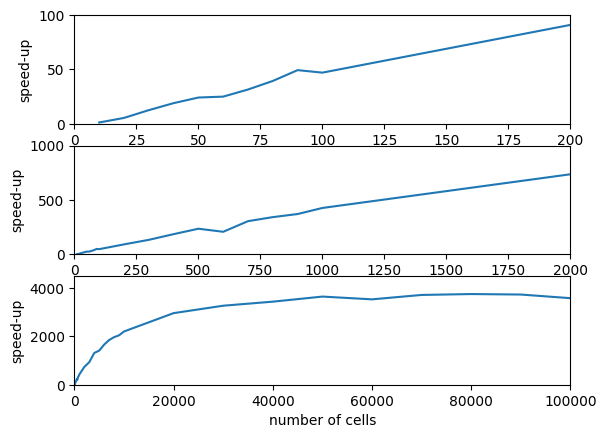

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
fig, ax = plt.subplots(3)

x = execution_times.keys()
y = result

ax[0].plot(x, y)
ax[0].set_ylabel('speed-up')
ax[0].set_xlabel('number of cells')
ax[0].set_xlim(0,200)
ax[0].set_ylim(0,100)

ax[1].plot(x, y)
ax[1].set_ylabel('speed-up')
ax[1].set_xlabel('number of cells')
ax[1].set_xlim(0,2000)
ax[1].set_ylim(0,1000)

ax[2].plot(x, y)
ax[2].set_ylabel('speed-up')
ax[2].set_xlabel('number of cells')
ax[2].set_xlim(0,100000)
ax[2].set_ylim(0,4500)

plt.show()